In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
mu = 0.001
sigma = 0.01
start_price = 5

In [14]:
np.random.seed(0)
returns = np.random.normal(loc=mu, scale=sigma, size=100000)
price = start_price*(1+returns).cumprod()

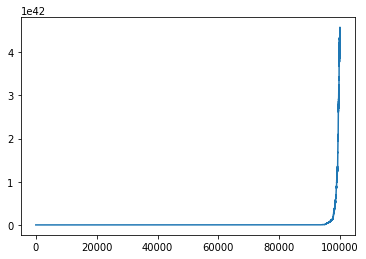

In [15]:
plt.plot(price)

In [16]:
def simulate(account_size, total_trades, risk_per_trade, win_rate, risk_reward):
    account = account_size
    accounts = [account]
    profits = []
    loss = []
    wins = []
    total_win = 0
    max_con_l = 0
    max_con_w = 0
    con_l = 0
    con_w = 0
    pre = 0
    rnd = list(np.round(np.random.uniform(1, 101, total_trades), 2))
    for i in range(len(rnd)):
        r = rnd[i]
        win = r <= win_rate
        risk = -np.round(account * risk_per_trade / 100, 2)
        profit_per_trade = abs(risk) * risk_reward
        profit = profit_per_trade if win else risk
        profits.append(profit)
        account += profit
        accounts.append(account)
        if profit > 0:
            total_win += 1
            wins.append(profit)
            con_l = 0
            if pre == 1:
                con_w += 1
                if con_w > max_con_w:
                    max_con_w = con_w
            pre = 1
        else: # 0 is also a loss (spread + commissions)
            loss.append(abs(profit))
            con_w = 0
            if pre == -1:
                con_l += 1
                if con_l > max_con_l:
                    max_con_l = con_l
            pre = -1
    avg_win = np.mean(wins)
    avg_loss = np.mean(loss)
    max_win = np.max(wins)
    max_loss = np.max(loss)
    win_r = np.round(total_win / total_trades * 100, 2)
    rrr = np.round(avg_win / avg_loss, 2)
    profit_factor = np.round(np.sum(wins) / np.sum(loss), 2)
    net_profits = np.cumsum(profits)
    gain = np.round(accounts[-1] - account_size, 2)
    growth_rate = np.round((accounts[-1] - account_size) / account_size * 100, 2)
    print("--- Trading Results ---\n")
    print("Total trades       : {}".format(total_trades))
    print("Wins               : {} / {}%".format(total_win, win_r))
    print("Average Win        : {}".format(np.round(avg_win, 2)))
    print("Average Loss       : {}".format(np.round(avg_loss, 2)))
    print("Max Win            : {}".format(np.round(max_win, 2)))
    print("Max Loss           : {}".format(np.round(max_loss, 2)))
    print("Max Cons. Wins     : {}".format(max_con_w))
    print("Max Cons. Loss     : {}".format(max_con_l))
    print("Risk Reward Ratio  : {}".format(rrr))
    print("Profit Factor      : {}".format(profit_factor))
    print("Risk per trade     : {}%".format(risk_per_trade))
    print("---")
    print("Initial Account    : {}".format(account_size))
    print("Profit             : {} / {}%".format(gain, growth_rate))
    print("Final Account      : {}".format(np.round(account, 2)))
    print()
    print("Results are compounded. Spread and commissions are not calculated.")
    fig, ax = plt.subplots(2, 1, figsize=(16, 10))
    ax[0].plot(net_profits)
    ax[1].plot(accounts)
    ax[1].axhline(account_size, color="#000000", ls="-.", linewidth=0.5)
    ax[0].set_title("Equirty Curve")
    ax[1].set_title("Account Growth")
    plt.show()

In [17]:
account_size = 10000
total_trades = 200 #trades per year maybe?
risk_per_trade = 2 #risk 2% of your account per trade
win_rate = 70 # in percentage
risk_reward = 2 # risk 1% profit 2%

--- Trading Results ---

Total trades       : 200
Wins               : 133 / 66.5%
Average Win        : 4738.95
Average Loss       : 2452.39
Max Win            : 18350.0
Max Loss           : 9542.0
Max Cons. Wins     : 14
Max Cons. Loss     : 3
Risk Reward Ratio  : 1.93
Profit Factor      : 3.84
Risk per trade     : 2%
---
Initial Account    : 10000
Profit             : 465970.71 / 4659.71%
Final Account      : 475970.71

Results are compounded. Spread and commissions are not calculated.


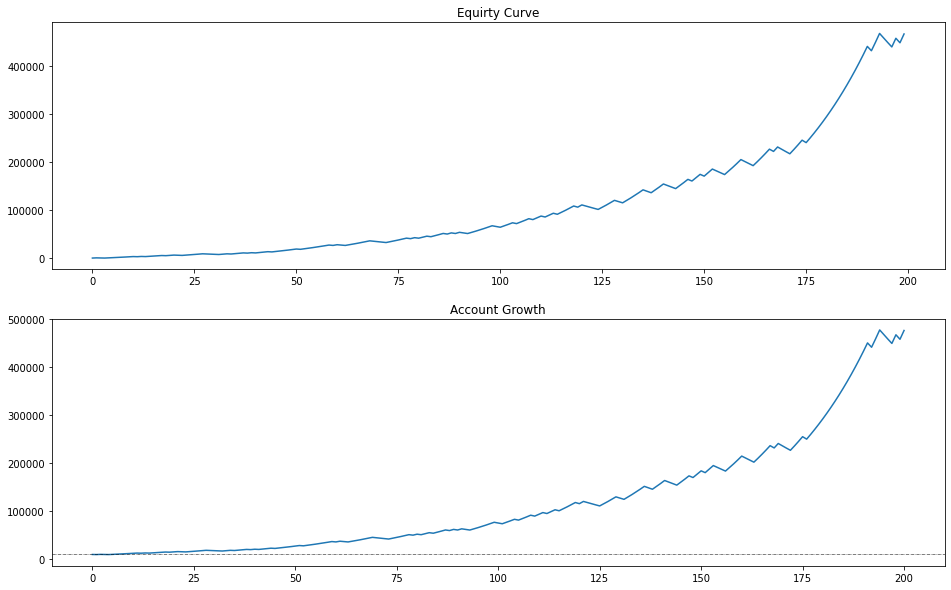

In [18]:
simulate(account_size, total_trades, risk_per_trade, win_rate, risk_reward)